In [102]:
import numpy as np
import matplotlib.pyplot as plt
def error(phi_a,phi_n):
    # compute error between analytical and numerical numbers

    return (phi_a-phi_n)/phi_a*100

# Comparison between FDM and FVM: Conservation properties and accuracy

Numerical solution:

Current node distance: 0.25
Current node distance: 0.5
Current node distance: 0.75

Analytical solution:
Current node distance: 0.0
Current node distance: 0.25
Current node distance: 0.5
Current node distance: 0.75
Current node distance: 1.0


/var/folders/q9/8vn_nzj55b55_336zczh1y2c0000gp/T/ipykernel_3045/4283525373.py:6: RuntimeWarning: invalid value encountered in divide
  return (phi_a-phi_n)/phi_a*100


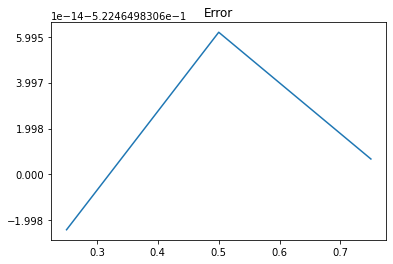

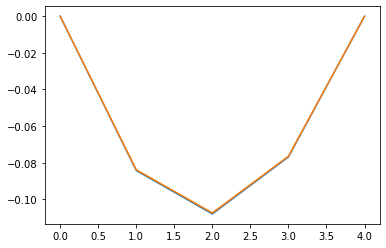

In [103]:

N=5    # Number of grid points
L = 1   # length
M = np.zeros((N,N)) # an empty matrix
S = np.zeros(N)

dx = L/(N-1)    # Grid size

#BCs of phi
phiL = 0
phiR = 0


# Left BCs
M[0,0]=1
S[0] = phiL

# Right BCs
M[N-1,N-1] = 1
S[N-1] = phiR

print(f'Numerical solution:\n')
# Construct Sparse Matrix
# Interior
for i in range(1,N-1):
    M[i,i] = -2/(dx**2)
    M[i,i-1] = 1/(dx**2)
    M[i,i+1] = 1/(dx**2)
    
    # Construct RHS matrix
    x = i*dx
    print(f'Current node distance: {x}')
    S[i] = -np.cos(x)


# Numerical method
phi = np.matmul(np.linalg.inv(M),-S)

print(f'\nAnalytical solution:')
# Analytical method 
phi_A = np.zeros((N))
for i in range(N):
    x = i * dx
    
    print(f'Current node distance: {x}')
    phi_A[i] = 1-np.cos(x) + (np.cos(1)-1)*x

# Error
e = error(phi_A,phi)

#
plt.title('Error')
plt.plot(np.arange(0,L+dx,dx),e)
plt.figure()
plt.plot(phi)
plt.plot(phi_A)

In [104]:
# LHS flux
Jl = -(4*phi[1]-phi[2]-3*phiL) / (2*dx)

# RHS flux
Jr = -(4*phi[-2] - phi[-3]-3*phiR)/(-2*dx)

# Analytical flux
Jl_A = 1-np.cos(1)
Jr_A = -np.sin(1)-(np.cos(1)-1)

# Total generation inside grid
S_total = (dx/2)*(S[0]+S[N-1])+dx*np.sum(S[1:N-1])
S_A = -np.sin(1)

# Imbalance
I = Jl-Jr+S_total


print(f'S_total: {S_total:.6f}, S_A: {S_A:.6f}, Imbalance: {I:.6f}')
print('As expected, the FDM method has handelled the convervation bad.')


S_total: -0.644546, S_A: -0.841471, Imbalance: 0.212575
As expected, the FDM method has handelled the convervation bad.


# FVM


Numerical solution:

Current cell distance: 0.375
Current cell distance: 0.625

Analytical solution:
Current cell distance: 0.125
Current cell distance: 0.375
Current cell distance: 0.625
Current cell distance: 0.875


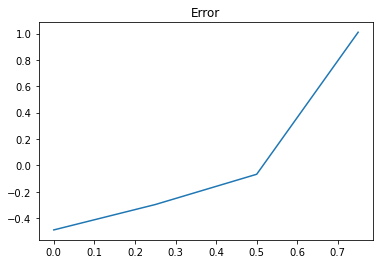

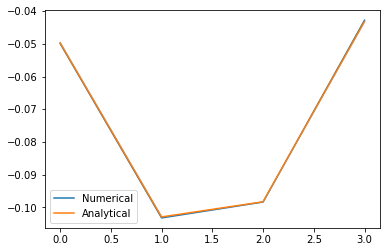

In [105]:

N=5    # Number of grid points
Nc = N-1 # Number of cells
L = 1   # length
M = np.zeros((Nc,Nc)) # an empty matrix for cells
S = np.zeros(Nc)

dx = L/Nc    # Grid size

#BCs of phi
phiL = 0
phiR = 0

# Left BCs
M[0,0] = -4/dx**2
M[0,1] = 4/(3*dx**2)

# The source term should calculate at cell center
# At LHS, the first cell center is at x = dx/2
S[0] = ((-np.cos(dx/2)) + 8/(3*dx**2)*phiL)

# Right BCs
M[Nc-1,Nc-1] = -4/dx**2
M[Nc-1,Nc-2] = 4/(3*dx**2)

# At RHS, the last cell center is at x = L - dx/2
S[Nc-1] = ((-np.cos(L-dx/2)) + 8/(3*dx**2)*phiR)

# Construct Sparse Matrix
# Interior
print(f'Numerical solution:\n')
for i in range(1,Nc-1):
    M[i,i] = -2/(dx**2)
    M[i,i-1] = 1/(dx**2)
    M[i,i+1] = 1/(dx**2)
    
    # Construct RHS matrix
    # If first cell, then x = x1 + 2 * (dx/2)
    # Otherwise, just add dx to jump to next cell
    if i ==1:
        x = dx/2
        x+=dx
    else:
        x += dx
    print(f'Current cell distance: {x}')
    S[i] = -np.cos(x)

# Numerical method
phi = np.matmul(np.linalg.inv(M),-S)

# Analytical method 
print(f'\nAnalytical solution:')
phi_A = np.zeros((Nc))
for i in range(Nc):
    if i ==0:
        x = dx/2
    elif i == Nc-1:
        x = L-dx/2
    else:
        x += dx
    print(f'Current cell distance: {x}')
    phi_A[i] = 1-np.cos(x) + (np.cos(1)-1)*x

# Error
e = error(phi_A,phi)

#
plt.title('Error')
plt.plot(np.arange(0,L,dx),e)
plt.figure()
plt.plot(phi,label='Numerical')
plt.plot(phi_A,label='Analytical')
# plt.plot(-S,label='S')
plt.legend()

In [106]:
# Flux at LHS, RHS
Jl = -(9*phi[0]-phi[1]-8*phiL) / (3*dx)
Jr = (9*phi[-1] - phi[-2] - 8 * phiR) / (  3*dx)

# Analytical flux
Jl_A = 1-np.cos(1)
Jr_A = -np.sin(1)-(np.cos(1)-1)

# Total generation: Sum over the cells, aka number of cells
S_total = 0
for i in range(Nc):
    S_total +=S[i]*dx

S_A = -np.sin(1)
I = Jl-Jr+S_total
print(f'S_total: {S_total:.6f}, S_A: {S_A:.6f}, Imbalance: {I:.6f}')
print('As expected, the FVM method has handelled the convervation well.')

S_total: -0.843666, S_A: -0.841471, Imbalance: 0.000000
As expected, the FVM method has handelled the convervation well.
